VOVA


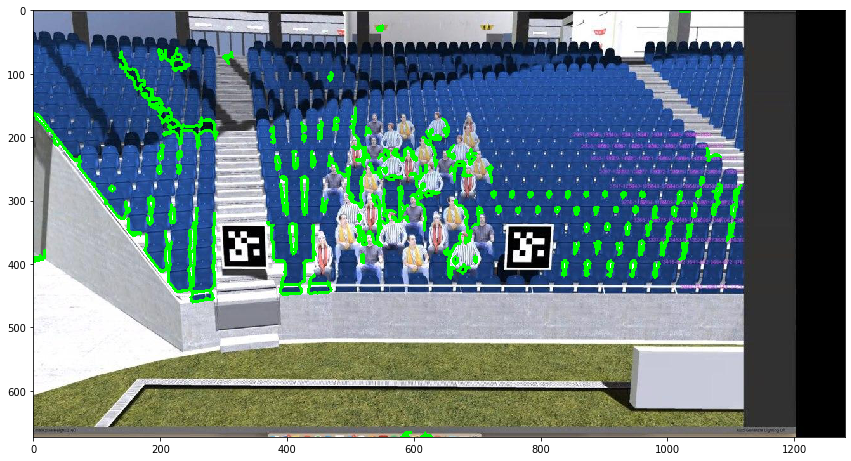

In [5]:
import cv2
import numpy as np
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt

# %matplotlib notebook

image_path = '../samples/unity_seats.jpg'
image = np.array(Image.open(image_path))

def get_squares(image, l_thresh , h_thresh, structuring_element_side):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 5)
    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpen = cv2.filter2D(blur, -1, sharpen_kernel)

    thresh = cv2.threshold(sharpen,25,50, cv2.THRESH_BINARY_INV)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

    cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    min_area = 25
    max_area = 1000
    image_number = 0
    squares = [] 
    for c in cnts:
        area = cv2.contourArea(c)
        if area > min_area and area < max_area:
            c = c.reshape(-1, 2)
            squares.append(c)
#         x,y,w,h = cv2.boundingRect(c)
#         ROI = image[y:y+h, x:x+h]
#         cv2.imwrite('ROI_{}.png'.format(image_number), ROI)
#         cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
            image_number += 1
    
    return squares, close, thresh

print("VOVA")
# print(sharpen.shape)
squares, close, thresh = get_squares(image, 10, 20, 3)
cv2.drawContours(image, squares, -1, (0, 255, 0), 3)


fig = plt.figure(figsize=(32, 28))
ax_orig = fig.add_subplot(121) 

plt.imshow(image)

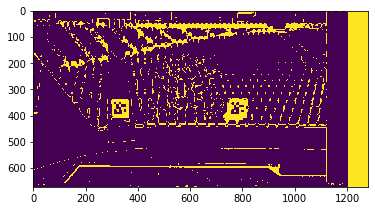

In [6]:
plt.imshow(close)

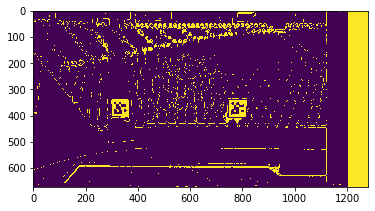

In [7]:
plt.imshow(thresh)


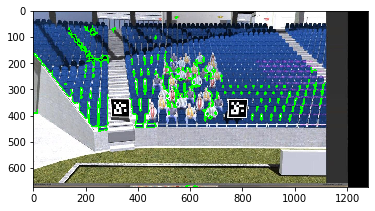

In [8]:
plt.imshow(image)

True

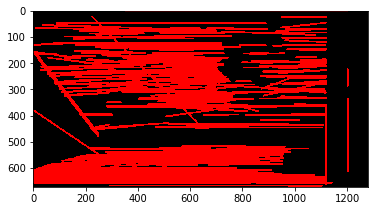

In [9]:
img = image.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)


rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 200  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)
cv2.imwrite('ROI.png', line_image)

In [10]:
from IPython.display import display
from ipywidgets import interact, widgets

l_thresh_default_value = 25
l_thresh_slider = widgets.IntSlider(value=l_thresh_default_value, min=0, max=l_thresh_default_value*2)

h_thresh_default_value = 50
h_thresh_slider = widgets.IntSlider(value=h_thresh_default_value, min=0, max=h_thresh_default_value*2)

#def get_squares(image, l_thresh , h_thresh, structuring_element_side):

def on_value_change(change):
    print(change)
    new_a = change['new']
    print("l_h", new_a)
#     b.min = new_a + 1
#     b.max = new_a + 6
    squares, close, thresh = get_squares(image, new_a, 200, 3)
    cv2.drawContours(image.copy(), squares, -1, (0, 255, 0), 3)

    plt.imshow(image)
l_thresh_slider.observe(on_value_change, names='value')
h_thresh_slider.observe(on_value_change, names='value')

display(l_thresh_slider, h_thresh_slider)

IntSlider(value=25, max=50)

IntSlider(value=50)

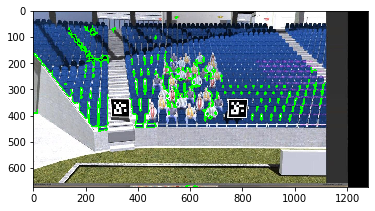

In [11]:
plt.imshow(image)

In [12]:
%%capture
%matplotlib inline
from ipywidgets import interact, widgets
from IPython.display import display
import matplotlib.pyplot as plt
import warnings

from skimage.morphology import disk
from skimage.filters import rank
from skimage.color import rgb2gray
import skimage.data


def f(Median_Size):
#     selem = disk(int(Median_Size))
#     with warnings.catch_warnings():
#         warnings.simplefilter("ignore")
#         img_median = rank.median(img_gray, selem=selem) 
        
    img_median = img_gray.copy()
    squares, close, thresh = get_squares(image, Median_Size, 50, 3)
    cv2.drawContours(img_median, squares, -1, (0, 255, 0), 3)


    ax_neu.imshow(img_median, cmap="gray")
    fig.canvas.draw()
    display(fig)
    
    
def f2(Median_Size):
#     selem = disk(int(Median_Size))
#     with warnings.catch_warnings():
#         warnings.simplefilter("ignore")
#         img_median = rank.median(img_gray, selem=selem) 
        
    img_median = img_gray.copy()
    squares, close, thresh = get_squares(image, 25, Median_Size, 3)
    cv2.drawContours(img_median, squares, -1, (0, 255, 0), 3)


    ax_neu.imshow(img_median, cmap="gray")
    print('Something')
    fig.canvas.draw()
    display(fig)


image = np.array(Image.open(image_path))    
img_gray = rgb2gray(image)

fig = plt.figure(figsize=(32, 28))
ax_orig = fig.add_subplot(121) 
ax_neu = fig.add_subplot(122) 

ax_orig.imshow(img_gray, cmap="gray")
ax_neu.imshow(img_gray, cmap="gray")

In [13]:
interact(f, Median_Size=widgets.IntSlider(min=0,max=100,step=1,value=25));
interact(f2, Median_Size=widgets.IntSlider(min=0,max=100,step=1,value=50));

interactive(children=(IntSlider(value=25, description='Median_Size'), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=50, description='Median_Size'), Output()), _dom_classes=('widget-interac…